In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
import pandas as pd
from tigramite import plotting as tp
import pickle
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr



# Function to generate data based on SCM using Tigramite

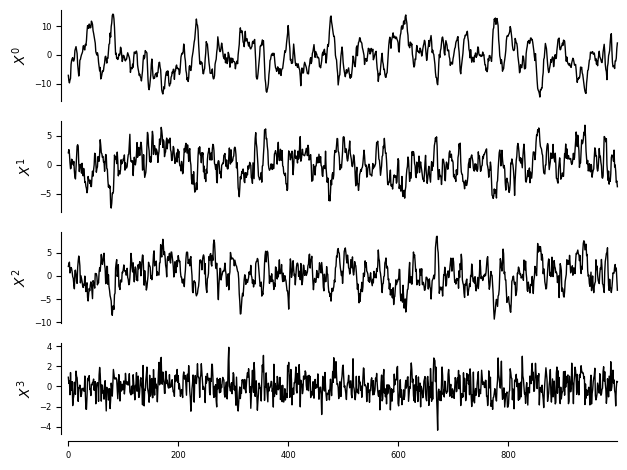

In [9]:
np.random.seed(42)     
def lin_f(x): return x 
links_coeffs = {0: [((0, -1), 0.7, lin_f), ((1, -1), -0.8, lin_f)],
                1: [((1, -1), 0.8, lin_f), ((3, -1), 0.8, lin_f)],
                2: [((2, -1), 0.5, lin_f), ((1, -2), 0.5, lin_f), ((3, -3), 0.6, lin_f)],
                3: [((3, -1), 0.4, lin_f)]
                } 
T = 1000     
data1, true_parents_neighbors = toys.structural_causal_process(links_coeffs, T=T)
T, N = data1.shape

var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
dataframe = pp.DataFrame(data1, 
                         datatime = {0:np.arange(len(data1))}, 
                         var_names=var_names)

df1 = pd.DataFrame(data1, columns=['x0', 'x1', 'x2', 'x3'])
dataframe = pp.DataFrame(data1, 
                         datatime = {0:np.arange(len(data1))}, 
                         var_names=var_names)

df1.to_pickle('tig_df.pkl')



tp.plot_timeseries(dataframe); plt.show()

# Function to generate data based on SCM

In [55]:
np.random.seed(42)

def lin_f(x):
    return x

def quad_f(x):
    return x**2

def sine_f(x):
    return np.sin(x)

def custom_structural_causal_process(links_coeffs, T):
    N = len(links_coeffs)
    data = np.zeros((T, N))
    
    # Initialize with random noise
    data = np.random.randn(T, N)
    
    # Find the maximum lag
    max_lag = max(abs(lag) for links in links_coeffs.values() for (_, lag), _, _ in links)
    
    # Apply the causal relationships
    for t in range(max_lag, T):
        for j in range(N):
            for (i, lag), coeff, func in links_coeffs[j]:
                data[t, j] += coeff * func(data[t + lag, i])
    
    return data



# All linear dependencies

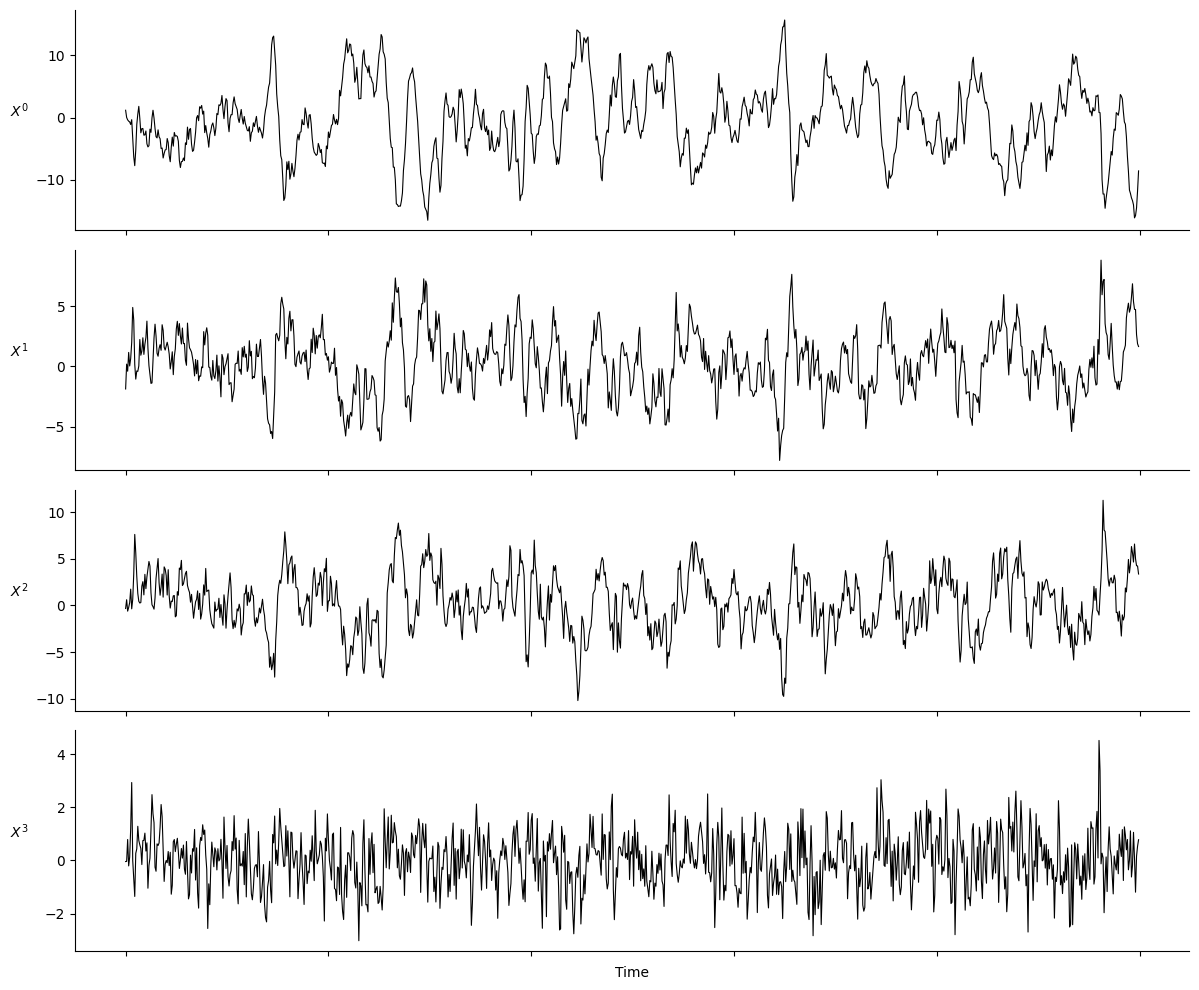

In [59]:
# Define the links and coefficients
links_coeffs = {
    0: [((0, -1), 0.7, lin_f), ((1, -1), -0.8, lin_f)],
    1: [((1, -1), 0.8, lin_f), ((3, -1), 0.8, lin_f)],
    2: [((2, -1), 0.5, lin_f), ((1, -2), 0.5, lin_f), ((3, -3), 0.6, lin_f)],
    3: [((3, -1), 0.4, lin_f)]
}

# Generate the data
T = 1000
data1 = custom_structural_causal_process(links_coeffs, T)

# Create the pandas DataFrame
df1 = pd.DataFrame(data1, columns=['x0', 'x1', 'x2', 'x3'])

df1.to_pickle('lin_df.pkl')



###########################################################################################################################
# Plotting
###########################################################################################################################


fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
fig.subplots_adjust(hspace=0)

for i in range(4):
    axs[i].plot(df1[f'x{i}'], color='black', linewidth=0.8)
    axs[i].set_ylabel(f'$X^{i}$', rotation=0, labelpad=10)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].yaxis.set_label_coords(-0.05, 0.5)

# Remove x-axis labels for all but the bottom subplot
for ax in axs[:-1]:
    ax.set_xticklabels([])

axs[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()

# All sine dependincies

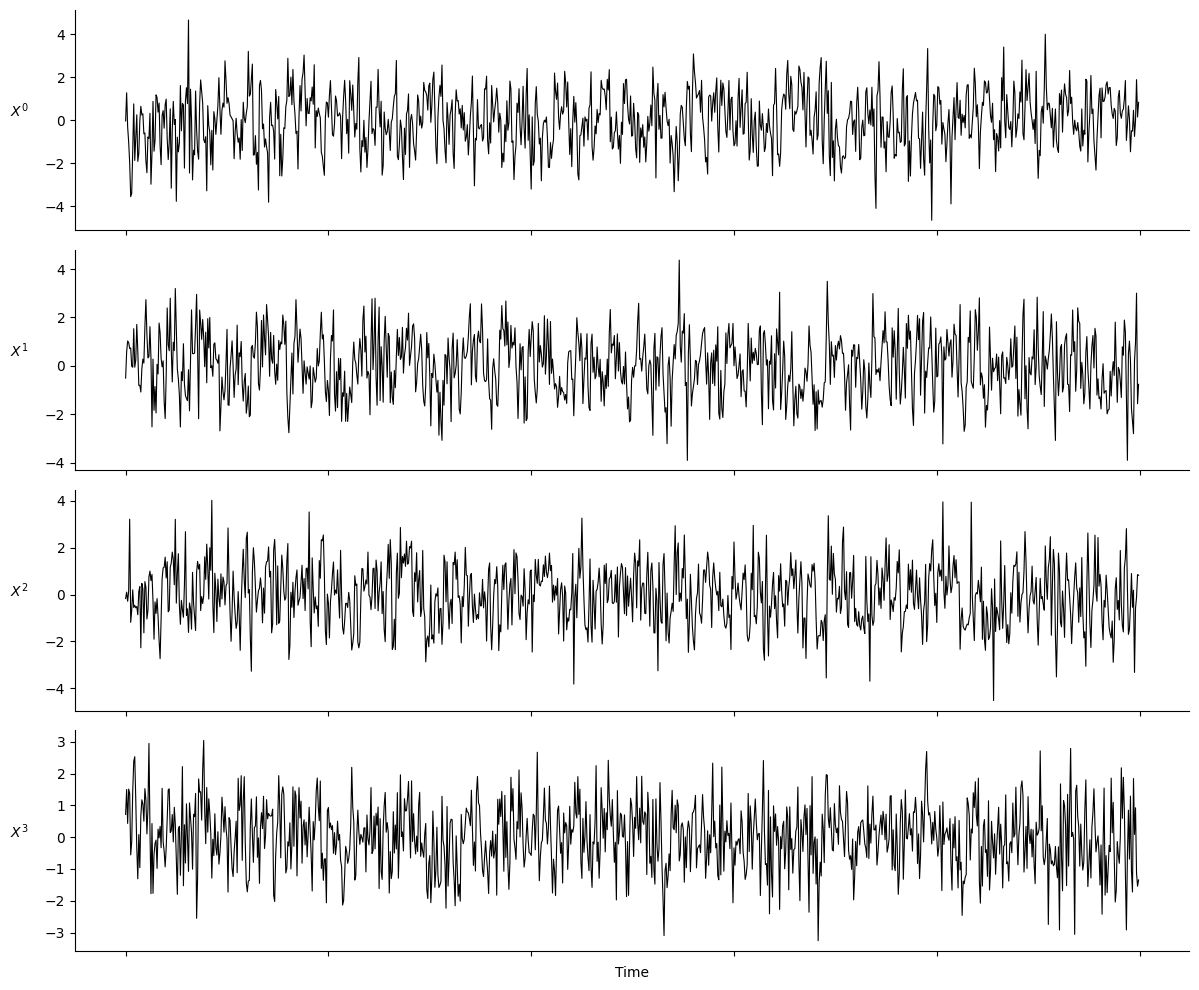

In [58]:
# Define the links and coefficients
links_coeffs = {
    0: [((0, -1), 0.7, sine_f), ((1, -1), -0.8, sine_f)],
    1: [((1, -1), 0.8, sine_f), ((3, -1), 0.8, sine_f)],
    2: [((2, -1), 0.5, sine_f), ((1, -2), 0.5, sine_f), ((3, -3), 0.6, sine_f)],
    3: [((3, -1), 0.4, sine_f)]
}

# Generate the data
T = 1000
data2 = custom_structural_causal_process(links_coeffs, T)

# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns=['x0', 'x1', 'x2', 'x3'])

df2.to_pickle('sin_df.pkl')


###########################################################################################################################
# Plotting
###########################################################################################################################



fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
fig.subplots_adjust(hspace=0)

for i in range(4):
    axs[i].plot(df2[f'x{i}'], color='black', linewidth=0.8)
    axs[i].set_ylabel(f'$X^{i}$', rotation=0, labelpad=10)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].yaxis.set_label_coords(-0.05, 0.5)

# Remove x-axis labels for all but the bottom subplot
for ax in axs[:-1]:
    ax.set_xticklabels([])

axs[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()